In [10]:
import pandas as pd

weatherDF = pd.read_csv('weather_classification_data.csv')
weatherDF

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [11]:
weatherDF.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [12]:
weatherDF.isna().any()

Temperature             False
Humidity                False
Wind Speed              False
Precipitation (%)       False
Cloud Cover             False
Atmospheric Pressure    False
UV Index                False
Season                  False
Visibility (km)         False
Location                False
Weather Type            False
dtype: bool

In [ ]:
weatherDF.dtypes
##need to remove objects/strings

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object

In [18]:
print(weatherDF['Cloud Cover'].unique())
print(weatherDF['Season'].unique())
print(weatherDF['Location'].unique())
print(weatherDF['Weather Type'].unique())

['partly cloudy' 'clear' 'overcast' 'cloudy']
['Winter' 'Spring' 'Summer' 'Autumn']
['inland' 'mountain' 'coastal']
['Rainy' 'Cloudy' 'Sunny' 'Snowy']


In [19]:
weatherDF['Cloud Cover'] = weatherDF['Cloud Cover'].replace({'partly cloudy': 1, 'clear': 0, 'overcast': 2, 'cloudy': 3})
weatherDF['Season'] = weatherDF['Season'].replace({'Winter': 1, 'Spring': 0, 'Summer' : 2, 'Autumn' : 3})
weatherDF['Location'] = weatherDF['Location'].replace({'inland': 1, 'mountain': 0, 'coastal': 2})
weatherDF['Weather Type'] = weatherDF['Weather Type'].replace({'Rainy': 1, 'Cloudy': 0, 'Sunny': 2, 'Snowy': 3})
print(weatherDF['Cloud Cover'].unique())
print(weatherDF['Season'].unique())
print(weatherDF['Location'].unique())
print(weatherDF['Weather Type'].unique())

[1 0 2 3]
[1 0 2 3]
[1 0 2]
[1 0 2 3]


C:\Users\Irfan\AppData\Local\Temp\ipykernel_12944\1862078925.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weatherDF['Cloud Cover'] = weatherDF['Cloud Cover'].replace({'partly cloudy': 1, 'clear': 0, 'overcast': 2, 'cloudy': 3})
C:\Users\Irfan\AppData\Local\Temp\ipykernel_12944\1862078925.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weatherDF['Season'] = weatherDF['Season'].replace({'Winter': 1, 'Spring': 0, 'Summer' : 2, 'Autumn' : 3})
C:\Users\Irfan\AppData\Local\Temp\ipykernel_12944\1862078925.py:3: FutureWarning: 

In [20]:
weatherDF.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover               int64
Atmospheric Pressure    float64
UV Index                  int64
Season                    int64
Visibility (km)         float64
Location                  int64
Weather Type              int64
dtype: object

In [21]:
weatherDF

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,1,1010.82,2,1,3.5,1,1
1,39.0,96,8.5,71.0,1,1011.43,7,0,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,0,5.5,0,2
3,38.0,83,1.5,82.0,0,1026.25,7,0,1.0,2,2
4,27.0,74,17.0,66.0,2,990.67,1,1,2.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1003.15,1,2,1.0,0,1
13196,-1.0,76,3.5,23.0,3,1067.23,1,1,6.0,2,3
13197,30.0,77,5.5,28.0,2,1012.69,3,3,9.0,2,0
13198,3.0,76,10.0,94.0,2,984.27,0,1,2.0,1,3


<Axes: >

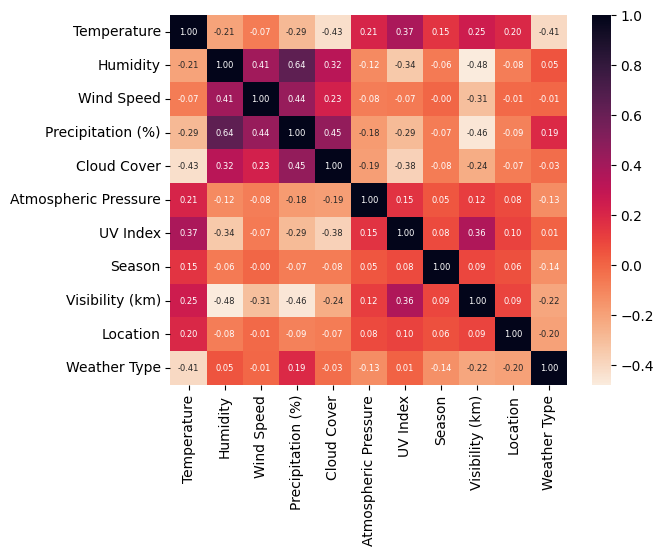

In [22]:
import seaborn as sns
sns.heatmap(weatherDF.corr(), annot=True, cmap='rocket_r', fmt='.2f', annot_kws={"size": 6})